In [334]:
import pandas as pd
from openpyxl import load_workbook
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [335]:
df = pd.read_csv (r'Nilai_Raport_Kimia.csv')
df

,No,NISN,Nama,L/ P,Harian,PAS/ PAT,Rapor,Predikat,Deskripsi
0,1,68757450,AFIFAH ULYA QURRATA AINI,P,80,80,80,B,Memiliki kemampuan baik terutama kemampuan dal...
1,2,64551214,AGHISTA ZARA SYAVITRI,P,80,80,80,B,Memiliki kemampuan baik terutama kemampuan dal...
2,3,71747289,ANISA SARWAN,P,78,78,78,C,Memiliki kemampuan cukup baik terutama kemampu...
3,4,78066468,AYU FADILAH,P,78,78,78,C,Memiliki kemampuan cukup baik terutama kemampu...
4,5,75951831,CEIS AGISTINA,P,78,78,78,C,Memiliki kemampuan cukup baik terutama kemampu...
...,...,...,...,...,...,...,...,...,...
128,129,40414684,VISTA SYIFA SALIMAH,P,87,87,87,B,Memiliki kemampuan baik terutama kemampuan dal...
129,130,3068557424,WA MIRA,P,88,87,88,B,Memiliki kemampuan baik terutama kemampuan dal...
130,131,49494903,WA NILA,P,88,87,88,B,Memiliki kemampuan baik terutama kemampuan dal...
131,132,38073220,WA ODE RISTA DEWI,P,88,87,88,B,Memiliki kemampuan baik terutama kemampuan dal...


In [336]:
df.columns =['No', 'NISN', 'Nama', 'Jenis_Kelamin', 'Nilai_Harian', 'Nilai_PAS', 'Nilai_Rapor', 'Predikat', 'Deskripsi']
df

,No,NISN,Nama,Jenis_Kelamin,Nilai_Harian,Nilai_PAS,Nilai_Rapor,Predikat,Deskripsi
0,1,68757450,AFIFAH ULYA QURRATA AINI,P,80,80,80,B,Memiliki kemampuan baik terutama kemampuan dal...
1,2,64551214,AGHISTA ZARA SYAVITRI,P,80,80,80,B,Memiliki kemampuan baik terutama kemampuan dal...
2,3,71747289,ANISA SARWAN,P,78,78,78,C,Memiliki kemampuan cukup baik terutama kemampu...
3,4,78066468,AYU FADILAH,P,78,78,78,C,Memiliki kemampuan cukup baik terutama kemampu...
4,5,75951831,CEIS AGISTINA,P,78,78,78,C,Memiliki kemampuan cukup baik terutama kemampu...
...,...,...,...,...,...,...,...,...,...
128,129,40414684,VISTA SYIFA SALIMAH,P,87,87,87,B,Memiliki kemampuan baik terutama kemampuan dal...
129,130,3068557424,WA MIRA,P,88,87,88,B,Memiliki kemampuan baik terutama kemampuan dal...
130,131,49494903,WA NILA,P,88,87,88,B,Memiliki kemampuan baik terutama kemampuan dal...
131,132,38073220,WA ODE RISTA DEWI,P,88,87,88,B,Memiliki kemampuan baik terutama kemampuan dal...


In [337]:
df.isna().sum()

No               0
NISN             0
Nama             0
Jenis_Kelamin    0
Nilai_Harian     0
Nilai_PAS        0
Nilai_Rapor      0
Predikat         0
Deskripsi        0
dtype: int64

In [338]:
tabel = df.loc[:,['NISN','Nama', 'Nilai_PAS', 'Nilai_Rapor']]
tabel

,NISN,Nama,Nilai_PAS,Nilai_Rapor
0,68757450,AFIFAH ULYA QURRATA AINI,80,80
1,64551214,AGHISTA ZARA SYAVITRI,80,80
2,71747289,ANISA SARWAN,78,78
3,78066468,AYU FADILAH,78,78
4,75951831,CEIS AGISTINA,78,78
...,...,...,...,...
128,40414684,VISTA SYIFA SALIMAH,87,87
129,3068557424,WA MIRA,87,88
130,49494903,WA NILA,87,88
131,38073220,WA ODE RISTA DEWI,87,88


In [339]:
x = tabel[['Nilai_PAS', 'Nilai_Rapor']].as_matrix()
print(x)

[[80 80]
 [80 80]
 [78 78]
 [78 78]
 [78 78]
 [80 80]
 [75 75]
 [80 80]
 [78 78]
 [78 78]
 [78 78]
 [78 79]
 [80 80]
 [70 70]
 [73 73]
 [80 80]
 [72 72]
 [78 78]
 [80 80]
 [75 76]
 [84 84]
 [86 86]
 [74 74]
 [78 78]
 [80 80]
 [73 73]
 [73 73]
 [80 80]
 [80 80]
 [80 80]
 [80 80]
 [76 76]
 [73 73]
 [78 78]
 [80 80]
 [80 80]
 [82 82]
 [80 80]
 [78 78]
 [80 80]
 [80 80]
 [81 82]
 [85 85]
 [78 78]
 [80 80]
 [80 80]
 [80 80]
 [84 84]
 [85 85]
 [87 87]
 [86 86]
 [84 84]
 [88 88]
 [83 83]
 [84 84]
 [84 84]
 [93 93]
 [85 85]
 [94 94]
 [90 90]
 [85 85]
 [84 84]
 [84 84]
 [87 87]
 [84 84]
 [84 84]
 [87 87]
 [87 87]
 [92 92]
 [89 89]
 [83 83]
 [92 92]
 [89 89]
 [85 85]
 [88 88]
 [85 85]
 [88 88]
 [84 84]
 [89 89]
 [86 86]
 [84 85]
 [87 88]
 [86 87]
 [90 90]
 [75 75]
 [83 83]
 [89 89]
 [89 89]
 [ 0 52]
 [88 88]
 [80 80]
 [86 86]
 [86 86]
 [86 86]
 [89 89]
 [86 86]
 [83 83]
 [86 86]
 [89 89]
 [88 88]
 [88 88]
 [88 88]
 [83 83]
 [88 88]
 [75 75]
 [84 84]
 [87 86]
 [88 88]
 [84 83]
 [86 86]
 [88 88]
 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


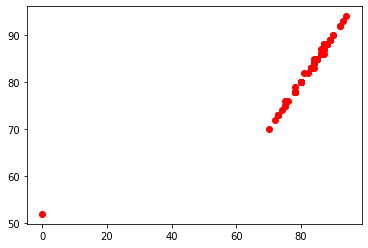

In [340]:
#melihat visualisasi data dari x
plt.plot(x[:,0],x[:,1],'ro')

In [341]:
#inisialisasi nilai cluster 3
kmeans = KMeans(n_clusters=3)

In [342]:
#melakukan clustering dengan data x
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [343]:
cluster = kmeans.cluster_centers_

In [344]:
#melihat pusat cluster 1-3
print(cluster)

[[86.42307692 86.47435897]
 [78.2037037  78.25925926]
 [ 0.         52.        ]]


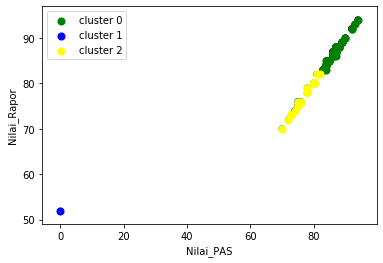

In [345]:
plt.scatter(x[:,0],x[:,1],c=kmeans.labels_,marker='o')
centroids = kmeans.cluster_centers_
labels = kmeans.labels_    
plt.scatter(x[y_km ==0,0], x[y_km == 0,1], s=50, color='green',label='cluster 0')
plt.scatter(x[y_km ==1,0], x[y_km == 1,1], s=50, color='blue',label='cluster 1')
plt.scatter(x[y_km ==2,0], x[y_km == 2,1], s=50, color='yellow',label='cluster 2')
plt.legend()
plt.xlabel('Nilai_PAS')
plt.ylabel('Nilai_Rapor')
plt.show()

In [346]:
y_predicted = kmeans.fit_predict(df[['Nilai_PAS', 'Nilai_Rapor']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1])

In [352]:
tabel['cluster'].value_counts()

0    78
1    54
2     1
Name: cluster, dtype: int64

In [347]:
tabel['cluster'] = y_predicted
tabel

,NISN,Nama,Nilai_PAS,Nilai_Rapor,cluster
0,68757450,AFIFAH ULYA QURRATA AINI,80,80,1
1,64551214,AGHISTA ZARA SYAVITRI,80,80,1
2,71747289,ANISA SARWAN,78,78,1
3,78066468,AYU FADILAH,78,78,1
4,75951831,CEIS AGISTINA,78,78,1
...,...,...,...,...,...
128,40414684,VISTA SYIFA SALIMAH,87,87,0
129,3068557424,WA MIRA,87,88,0
130,49494903,WA NILA,87,88,0
131,38073220,WA ODE RISTA DEWI,87,88,0


In [349]:
tabel[:60]

,NISN,Nama,Nilai_PAS,Nilai_Rapor,cluster
0,68757450,AFIFAH ULYA QURRATA AINI,80,80,1
1,64551214,AGHISTA ZARA SYAVITRI,80,80,1
2,71747289,ANISA SARWAN,78,78,1
3,78066468,AYU FADILAH,78,78,1
4,75951831,CEIS AGISTINA,78,78,1
5,78010944,CHINTANY AYSKHA FAYRANA SAFRUDDIN,80,80,1
6,67196469,DIAN AL FAIZAH,75,75,1
7,71248270,FAJAR BAKTI SUPRAPTO,80,80,1
8,74302038,L.M RIZKI FEBRIAWAN RAHMAD,78,78,1
9,73869057,L.M. SHAFWAN FEBRIADY,78,78,1


In [350]:
tabel[60:120]

,NISN,Nama,Nilai_PAS,Nilai_Rapor,cluster
60,54726233,RIZKY ABDULLAH ALRASYID,85,85,0
61,45564835,SARFIN DIEN,84,84,0
62,24501805,SARIANTI PARTIWI,84,84,0
63,57037855,SOFIYANTI,87,87,0
64,55199551,SUMARLIN. A,84,84,0
65,68127194,WA ODE FEBRIANTI,84,84,0
66,55027525,WA ODE MEI RAMADANI,87,87,0
67,69365193,ZUHRIA,87,87,0
68,48170010,AHMAD SAKWAN A.,92,92,0
69,50999517,AMANDA,89,89,0


In [351]:
tabel[120:]

,NISN,Nama,Nilai_PAS,Nilai_Rapor,cluster
120,46624290,LA ODE MUH. SYUKRAN SALMAN,84,84,0
121,34082850,MIRNA WATI,88,88,0
122,25104576,NEFRIA,86,86,0
123,42411955,RISKA AMALIA,85,85,0
124,15040333,SARAH,86,86,0
125,41025285,SITI SOFIA HARTIN,84,84,0
126,34974410,SUKMA AYU PURNAMA. R,80,80,1
127,46767233,TETI KURNIAWATI,87,87,0
128,40414684,VISTA SYIFA SALIMAH,87,87,0
129,3068557424,WA MIRA,87,88,0
